# Imports

In [1]:
import Simulate_springs
from IPython.display import Video, Image
from integration_methods import EulerScheme
%load_ext autoreload
%autoreload 2


# Description

I implemented a class called SpringSystem. It wraps up elements needed for the simulation of bodies with a mass m connected by springs. The picture below shows a system of 2 bodies for example.

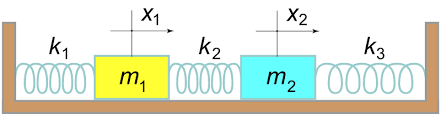

In [3]:
Image("./mass_spring.png")

## Ordinary Differential Equation
The system of ODEs that governs the system is :
$m(x_1)'' = -b_1 x_1' - k_1(x_1 - L_1) + k_2(x_2 - x_1 - L_2)
\\
...
\\
m(x_i)'' = - b_i x_i' - k_i(x_i - x_{i-1} - L_i) + k_{i+1}(x_{i+1} - x_i - L{i+1})
\\...
\\m_(x_n)'' = - b_n * x_n' - k_n(end_point - x_n -L_{n+1}) - k_n(x_n - x_{n-1} - L_n)$

## Integration method
Two methods are available :
- Euler method, the classic method for approximating the solution of an ODE:
- Implicit midpoint method.

### Euler method
If an ODE has the following structure : $dy/dt = f(t, y)$ then we approximate with:
$y_{t_{k+1}} = y_{t_k} + \Delta_k f(t_k, y_{t_k})$

### Implicit midpoint method
We approximate $y$ by  : $y_{t_{k+1}} = y_{t_k} + \Delta_k(t_k + \frac{\Delta_k}{2}, \frac{1}{2}(y_{t_k} + y_{t_{k+1}}))$.

This method is more accurate (and thus set by default in the model).

## Parameters setting
Every parameters has a default value, but one can modify it (see the help function of the init).

In [4]:
help(Simulate_springs.SpringsSystem.__init__)

Help on function __init__ in module Simulate_springs:

__init__(self, n=5, x=None, y=None, m=None, k=None, L=None, b=None, seed=None)
    Initialize the System of n bodies connected by springs.
    Arguments:
        n (int) : Number of bodies,
        x (array type) : Array of initial position. Be randomly Initialized by default.
        y (array type) : Array of initial velocity. Be randomly Initialized by default.
        m (array type) : Masses of the bodies
        k (array type) : Resistence of Springs
        L (array type) : Length of Springs
        b (array type) : Friction of bodies
        seed (int) : Set a seed if we want to replicate the explirence



# Simulation of 5 bodies
We create the system

In [5]:
S = Simulate_springs.SpringsSystem() # Create an instance of the class, set all the parameters to their default values
data = S.simulate() # Simulate a data set

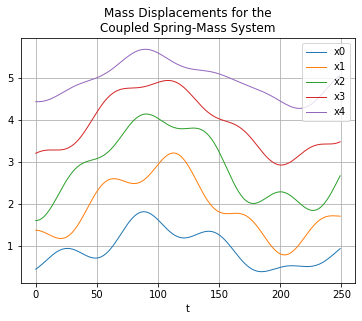

In [6]:
S.plot_position(data) # Plot the position through time of each mass.

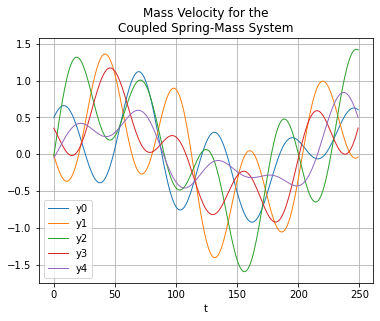

In [7]:
S.plot_velocity(data) # Plot the velocity of each body through time.

# Create and save a video
If the cell below is ran, then it will be saved under "SimulationSprings.mp4" (locally in the folder where this notebook is set).

In [11]:
from create_video import create_video # Needed the package cv2

In [9]:
create_video(data)

# Simulation of 50 bodies

In [298]:
n = 50
S = Simulate_springs.SpringsSystem(n)
data = S.simulate()

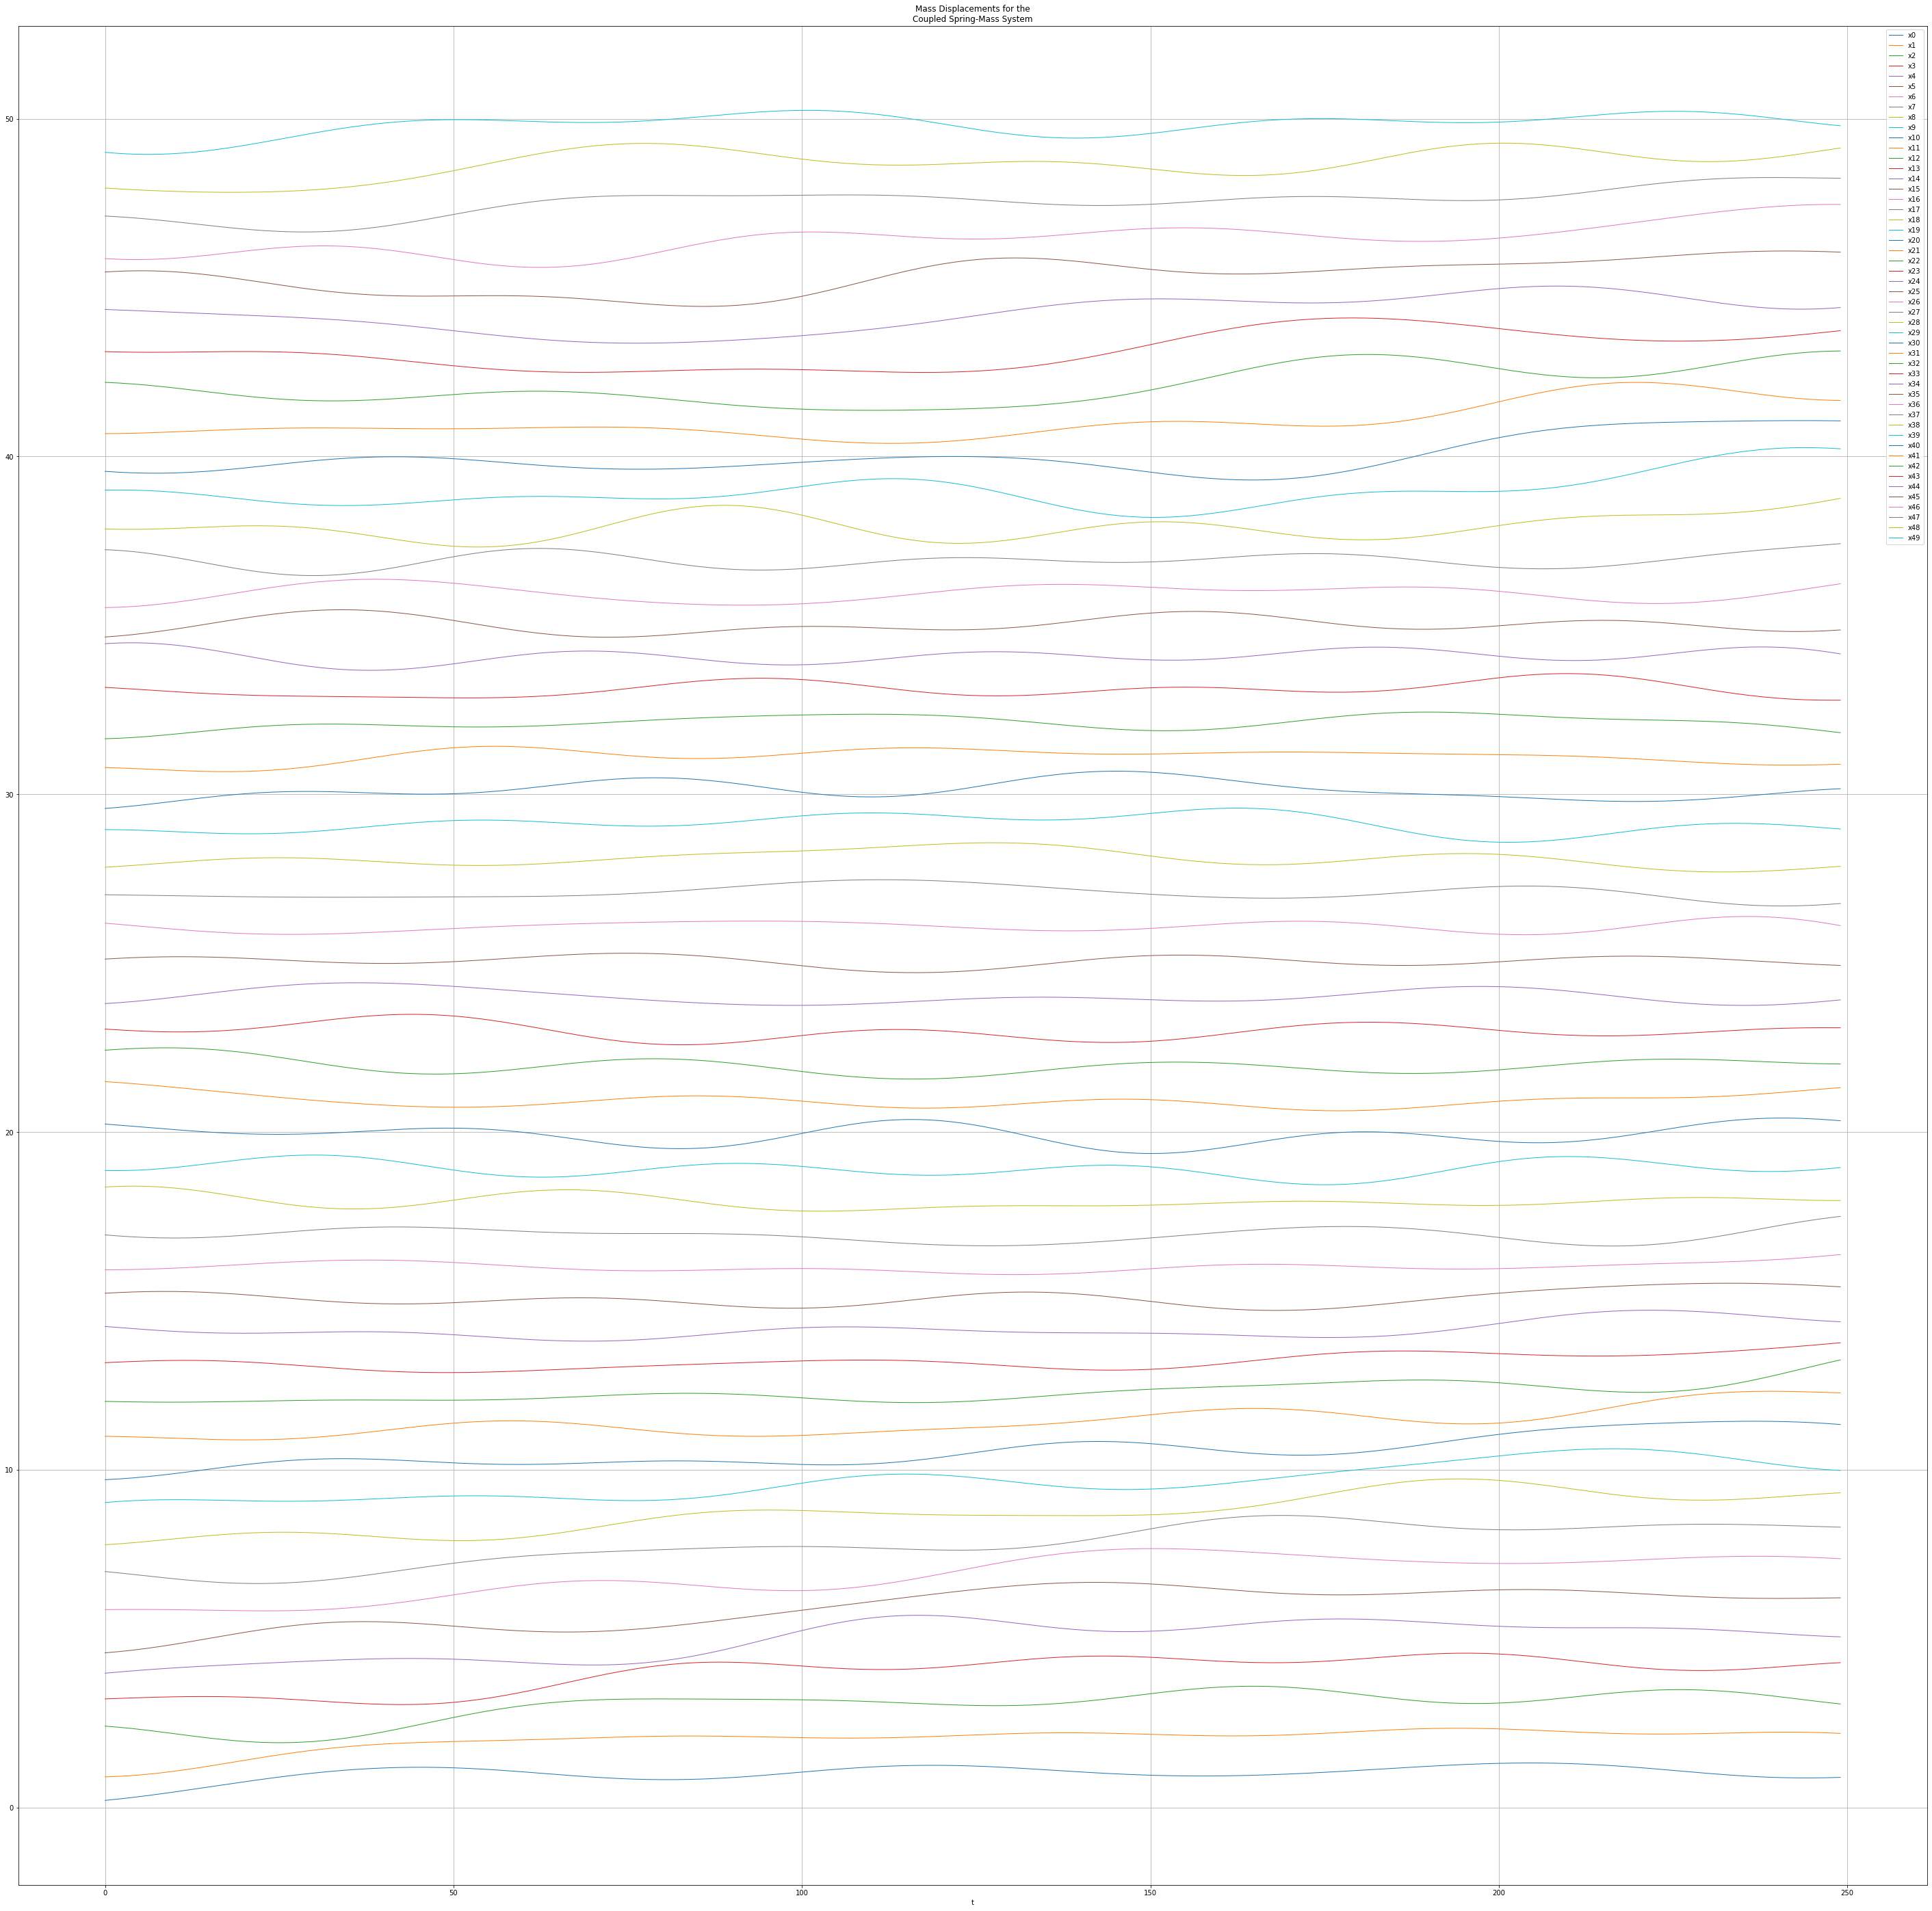

In [299]:
S.plot_position(data, figsize=(50, 50))

# Simulation with EulerScheme
Simulation with a different integrator.

In [320]:
S = Simulate_springs.SpringsSystem()
data = S.simulate(method=EulerScheme)

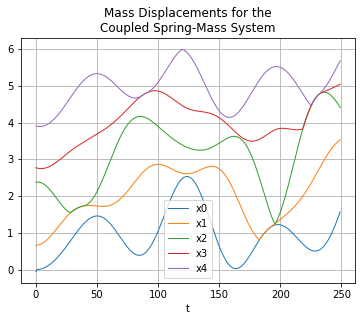

In [321]:
S.plot_position(data)